In [97]:
from time import time
import numpy as np
from mpmath import mp
import matplotlib.pyplot as plt


In [141]:
f1 = lambda x: mp.cos(x) * mp.cosh(x) - 1
df1 = lambda x: mp.cos(x) * mp.sinh(x) - mp.cosh(x) * mp.sin(x)
f2 = lambda x: 1/x - mp.tan(x)
f3 = lambda x: 2 ** (-x) + mp.e ** x + 2 * mp.cos(x) - 6

In [119]:
def bisection_method(f, a, b, eps_x, eps_y):
    c = mp.mpf(0)

    i = 0
    while True:
        # print(abs(b - a))
        if abs(b - a) < eps_x:
            return c, i, "eps_x stop"

        i += 1
        c = a + (b - a) / 2
        if abs(f(c)) < eps_y:
            return c, i, "eps_y stop"

        if mp.sign(f(a)) == mp.sign(f(c)):
            a = c
        else:
            b = c



In [110]:
def newton_method(f, df, x_0, max_iter, eps):
    x = x_0
    for i in range(max_iter):
        prev_x = x
        x = x - f(x)/df(x)
        if abs(x - prev_x) < eps:
            return x, i + 1, "eps stop"

    return x, max_iter, "max_iter stop"

In [117]:
def secant_method(f, x_n, x_n_min_1, max_iter, eps):
    for i in range(max_iter):

        temp = x_n
        x_n = x_n - f(x_n)*(x_n - x_n_min_1)/(f(x_n) - f(x_n_min_1))
        x_n_min_1 = temp
        if abs(x_n - x_n_min_1) < eps:
            return x_n, i + 1, "eps stop"

    return x_n, max_iter, "max_iter stop"

In [128]:
def mixed_method(f, a, b, eps, max_iter):
    c = mp.mpf(0)
    for i in range(3):
        c = a + (b - a) / 2
        if mp.sign(f(a)) == mp.sign(f(c)):
            a = c
        else:
            b = c

    x_n = c
    x_n_min_1 = a + (b - a) / 2

    for i in range(max_iter):
        temp = x_n
        x_n = x_n - f(x_n)*(x_n - x_n_min_1)/(f(x_n) - f(x_n_min_1))
        x_n_min_1 = temp
        if abs(x_n - x_n_min_1) < eps:
            return x_n, i + 1, "eps stop"

    return x_n, max_iter, "max_iter stop"

In [151]:
mp.dps = 10
mp.pretty = True

# print(bisection_method(f1, 3/2*mp.pi, 2*mp.pi, mp.mpf('0.0000001'), mp.mpf('0.0000001')))
# print(newton_method(f1, df1, mp.mpf('5'), 100, mp.mpf('0.0000001')))
# print(secant_method(f1, 3, 5, 100, mp.mpf('0.0000001')))
print(secant_method(f2, 1/8, 1/4*mp.pi, 100, mp.mpf('10e-7')))

(0.860333589, 6, 'eps stop')


In [159]:
mp.dps = 50
mp.pretty = True

epsilons = [mp.mpf('10e-7'), mp.mpf('10e-14'), mp.mpf('10e-21'), mp.mpf('10e-28'), mp.mpf('10e-35')]

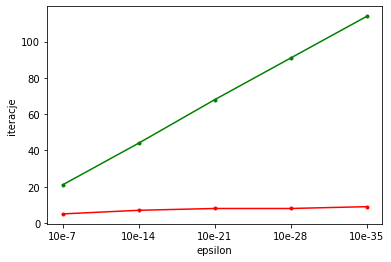

In [164]:
mixed = []
bisection = []

for eps in epsilons:
    mixed.append(mixed_method(f1, 3/2*mp.pi, 2*mp.pi, eps, 100)[1])
    bisection.append(bisection_method(f1, 3/2*mp.pi, 2*mp.pi, eps, eps)[1])

plt.plot(["10e-7", "10e-14", "10e-21", "10e-28", "10e-35"], mixed, marker='.', color='r', label='bisection + secant')
plt.plot(["10e-7", "10e-14", "10e-21", "10e-28", "10e-35"], bisection, marker='.', color='g', label='bisection')

plt.xlabel('epsilon')
plt.ylabel('iteracje')
plt.show()

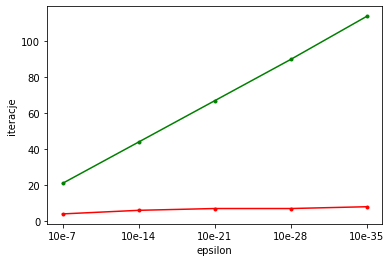

In [165]:
mixed = []
bisection = []

for eps in epsilons:
    mixed.append(mixed_method(f2, 0 + eps, 1/2*mp.pi, eps, 100)[1])
    bisection.append(bisection_method(f2, 0 + eps, 1/2*mp.pi, eps, eps)[1])

plt.plot(["10e-7", "10e-14", "10e-21", "10e-28", "10e-35"], mixed, marker='.', color='r')
plt.plot(["10e-7", "10e-14", "10e-21", "10e-28", "10e-35"], bisection, marker='.', color='g')

plt.xlabel('epsilon')
plt.ylabel('iteracje')
plt.show()

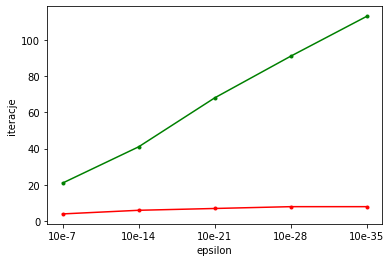

In [166]:
mixed = []
bisection = []

for eps in epsilons:
    mixed.append(mixed_method(f3, mp.mpf('1'), mp.mpf('3'), eps, 100)[1])
    bisection.append(bisection_method(f3, mp.mpf('1'), mp.mpf('3'), eps, eps)[1])

plt.plot(["10e-7", "10e-14", "10e-21", "10e-28", "10e-35"], mixed, marker='.', color='r')
plt.plot(["10e-7", "10e-14", "10e-21", "10e-28", "10e-35"], bisection, marker='.', color='g')

plt.xlabel('epsilon')
plt.ylabel('iteracje')
plt.show()

In [ ]:
# mp.dps = 50
# mp.pretty = True
# mp.cos(mp.mpf("1.1234")) * mp.cosh(mp.mpf("1.1234"))
# mp.sqrt(6*mp.zeta(2))
# str(mp.pi)
# mp.sqrt(5)

# mp.mpf('0.9')
# mp.sign(124124) == 1